In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from pickle import dump, load
from sklearn.datasets import load_digits

In [3]:
def load_images(images_folder, save_file_to=None):
    
    X_original = []
    X = []
    y = []
    
    for subdir, dirs, files in os.walk(images_folder):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(subdir, file)
                label = os.path.basename(subdir)
                
                image = Image.open(img_path).convert('L')
                image = image.resize((48, 48))  # Resize to 32x32 to reduce memory usage
                X_original.append(np.array(image).flatten())
                X.append(np.array(image).flatten())
                y.append(label)
                
    if save_file_to:
        with open(save_file_to, "wb") as f:
            dump((X_original, X, y), f, protocol=5)
                
    return np.array(X_original), np.array(X), np.array(y)

images_folder = '../images'
dataset_file = "dataset_dump.pkl"

# Load images and save the dataset for reuse
X_original, X, y = load_images(images_folder, save_file_to=dataset_file)

In [4]:
with open("dataset_dump.pkl", "rb") as f:
    X_original,X,y = load(f)
    
X
y

['happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',


In [5]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [6]:
def preprocessing_data(X, y,save_file_to=None):
    # Normalize pixel values
    X = X / 255.0  # Normalize to [0, 1]
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Dimensionality reduction with PCA
    pca = PCA(n_components=100)
    X_reduced = pca.fit_transform(X)
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reduced)
    
    if save_file_to:
        with open(save_file_to, "wb") as f:
            dump((X_scaled, y_encoded, label_encoder, pca, scaler), f, protocol=5)
    
    return X_scaled, y_encoded, label_encoder, pca, scaler

X_scaled, y_encoded, label_encoder, pca, scaler = preprocessing_data(X, y, save_file_to="labelencoder_standardscaler_pca_normalizers_dump.pkl")


In [7]:
with open("labelencoder_standardscaler_pca_normalizers_dump.pkl", "rb") as f:
    X_scaled, y_encoded, label_encoder, pca, scaler = load(f)

# x_scaled and y_encoded not used

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [9]:
X_train[0]

array([-0.66950703,  0.65021336,  1.44224978,  0.61714101, -0.57612907,
       -0.74515748, -0.390986  , -0.48420412, -0.00195449, -0.20084574,
       -0.12432153, -0.07540688, -0.19210925,  0.00849106, -0.2633892 ,
        0.40484797,  0.15456024,  0.27116818, -0.13523964,  0.02413744,
        0.3058789 ,  0.33283037, -0.68440363,  0.35933619,  0.34168407,
        0.0207819 , -0.8228576 ,  0.12622621,  0.1897143 ,  0.05547881,
       -0.27727136,  0.19708116,  0.45592604,  0.23916883,  0.62417625,
       -0.01043042,  0.21119331,  0.34866471, -0.10645286, -0.41509724,
        0.21948848, -0.49032595,  0.31454399,  0.79194923, -0.04263028,
       -0.52902618,  0.08681178, -0.64405771,  0.6674887 ,  0.24620936,
       -0.60784895, -0.25893669, -0.17103878, -0.62046422,  0.60889654,
        0.26103698,  0.78072264, -0.00636989,  0.75860918,  0.13012532,
        0.62554947, -0.12482282, -0.06092575,  0.17152258,  1.05624723,
        0.03265598, -0.729539  ,  0.01216441,  0.64677884,  0.16

In [8]:
def train_and_evaluate_knn(X_train, y_train, X_test, y_test, label_encoder):
    param_grid = {
        'n_neighbors': [1, 3, 5, 7],  
        'metric': ['euclidean', 'manhattan'],
        'weights': ['uniform', 'distance']  
    }

    best_combination = None
    best_accuracy = 0

    all_combinations = list(ParameterGrid(param_grid))
    for combination in all_combinations:
        print(combination)
        knn_model = KNeighborsClassifier(**combination)
        knn_model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = knn_model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = combination
    
    # Print the best combination
    print("\nBest Combination:", best_combination)
    print(f"Best Accuracy: {best_accuracy:.2f}")
    print("\nTotal combinations:", len(all_combinations))

    # Train the best model on the entire training set
    best_model = KNeighborsClassifier(**best_combination)
    best_model.fit(X_train, y_train)

    # Save the best model
    with open("knn_model_standardscaler_grisearch_pca_dump.pkl", "wb") as f:
        dump(best_model, f, protocol=5)
    print("Best model saved successfully!")

    return best_model, best_combination

best_model, best_combination = train_and_evaluate_knn(X_train, y_train, X_test, y_test, label_encoder)



{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

       angry       0.88      0.85      0.87      1963
     disgust       0.88      0.94      0.91       217
        fear       0.86      0.87      0.87      2064
       happy       0.92      0.87      0.89      3590
     neutral       0.82      0.89      0.85      2504
         sad       0.88      0.87      0.87      2417
    surprise       0.90      0.92      0.91      1600

    accuracy                           0.88     14355
   macro avg       0.88      0.89      0.88     14355
weighted avg       0.88      0.88      0.88     14355

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

       angry       0.88      0.85      0.87      1963
     disgust       0.88      0.94      0.91       217
        fear       0.86      0.87  

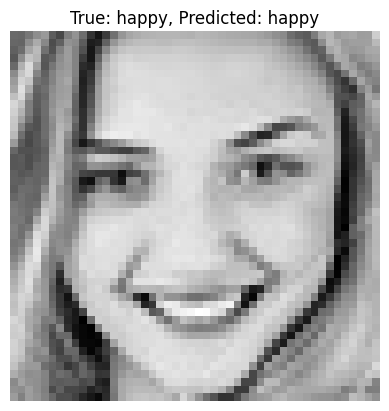

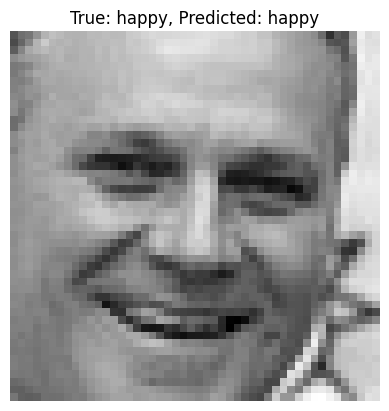

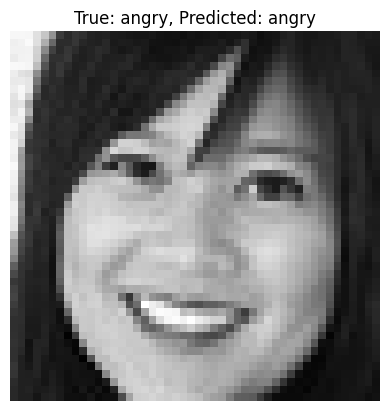

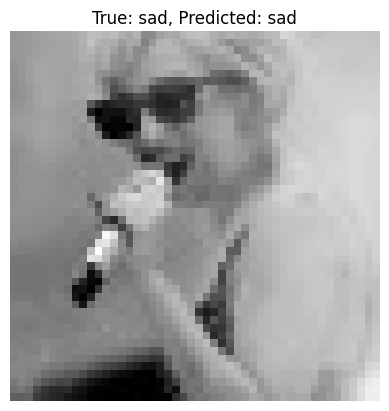

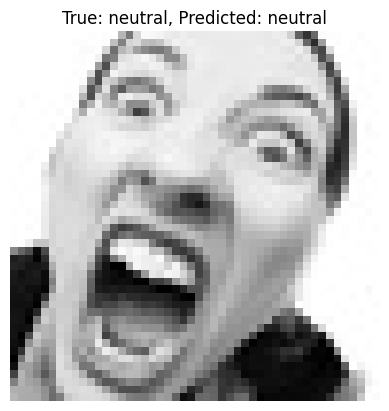

In [10]:
def visualize_predictions(best_model, X_test, y_test, label_encoder, X_original):
    y_pred = best_model.predict(X_test)
    random_indices = np.random.randint(0, len(y_test), 5)
    
    for idx in random_indices:
        original_image = X_original[idx].reshape(48, 48)  # Reshape to 48x48
        plt.imshow(original_image, cmap='gray')
        plt.title(f"True: {label_encoder.inverse_transform([y_test[idx]])[0]}, "
                  f"Predicted: {label_encoder.inverse_transform([y_pred[idx]])[0]}")
        plt.axis('off')
        plt.show()

visualize_predictions(best_model, X_test, y_test, label_encoder, X_original)